In [34]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import collections

In [35]:
# Question 1:

In [67]:
def createErdosRenyiGraph(n, p):
    G = nx.Graph()
    for i in range(1, n+1):
        G.add_node(i)
        for j in range(i+1, n+1):
            if random.uniform(0, 1) < p:
                G.add_edge(i, j)
    nx.draw(G, with_labels = True)
    plt.show()
    return G

In [68]:
def nodeClusteringCoefficient(G, node,degree):
    value=degree*(degree-1)
    if value==0:
        return 0
    counter=0
    for n1 in G.neighbors(node):
        for n2 in G.neighbors(node):
            if G.has_edge(n1,n2):
                counter+=1
    
    result =counter/value
    print("The clusring of node", node," ","is:",result)
    return result

def computeClusteringCoefficient(G):
    degrees = [val for (node, val) in G.degree()]
    result =0
    i=0
    for node in G.nodes():
        result +=nodeClusteringCoefficient(G, node,degrees[i])
        i+=1
        
    result= result/len(G)
   
    return result


In [69]:
def gather_statistics(n,p):
    G =createErdosRenyiGraph(n, p)

    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks(deg)
    ax.set_xticklabels(deg)
    plt.show()
    
    result =computeClusteringCoefficient(G)
    print("The result of the Clustering Coefficient is :",result)
    
    result =nx.diameter(G)
    print("The result of the diameter is :",result)


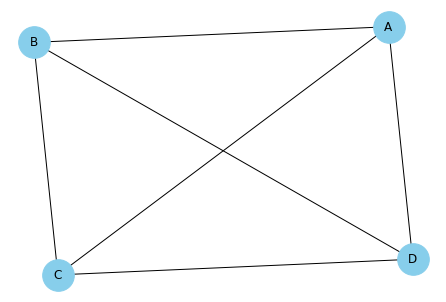

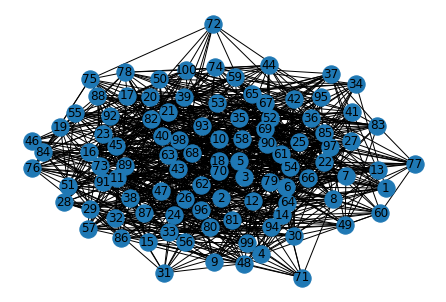

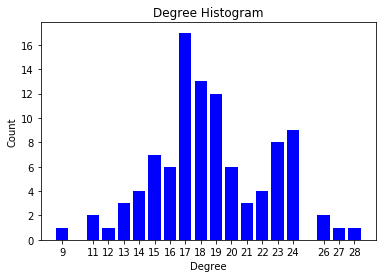

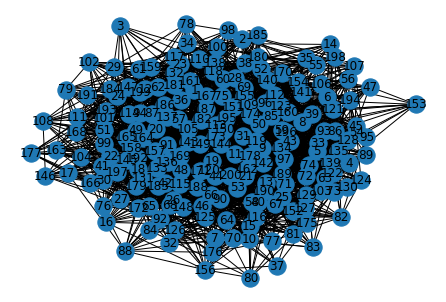

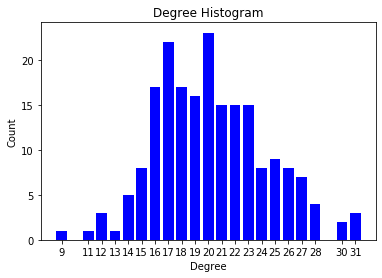

In [71]:
        
import matplotlib.pyplot as plt
import random

G=nx.Graph()
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")

G.add_edge("A", "B")
G.add_edge("A", "C")
G.add_edge("A", "D")
G.add_edge("B", "D")
G.add_edge("C", "D")
G.add_edge("B", "C")

nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue")
plt.show()

gather_statistics(100,0.2)
gather_statistics(200,0.1)

In [72]:
# Question 3:

In [224]:
def createAssignErdosRenyiGraph(n, p, possitive_edges_prob):
    G = nx.Graph()
    for i in range(1, n+1):
        G.add_node(i)
        for j in range(i+1, n+1):
            if random.uniform(0, 1) < p:
                if random.uniform(0,1) < possitive_edges_prob:
                    G.add_edge(i, j, label='+')
                else:
                    G.add_edge(i, j, label='-')              
    return G

In [225]:
def displayGraph(G):
        
    positive_egdes = [(u,v) for (u,v,d) in G.edges(data=True) if d['label'] =='+']
    negative_egdes = [(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == '-']
    
    pos = nx.circular_layout(G)
    
    # Draw nodes
    nx.draw_networkx_nodes(G,pos,node_size=100, node_color='orange')

    # Draw edges
    nx.draw_networkx_edges(G,pos,edgelist=positive_egdes, width=2, edge_color='g')
    nx.draw_networkx_edges(G,pos,edgelist=negative_egdes, width=3, alpha=0.5,edge_color='b', arrows=False,style='dashed')

    # Draw node labels
    nx.draw_networkx_labels(G,pos,font_size=10,font_family='sans-serif')

    # Draw edge labels
    edge_labels =dict([((u, v), d['label']) for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.axis('off')
    plt.show() # display

In [235]:
def checkBalance(G):
    
    print("The input graph:")
    displayGraph(G)
    
    #list the positive egdes and negative egdes
    positive_egdes = [(u,v) for (u,v,d) in G.edges(data=True) if d['label'] =='+']
    negative_egdes = [(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == '-']
    
    #Build a positive edges graph
    positive_graph = nx.Graph()
    positive_graph.add_edges_from(positive_egdes)
    
    #Add isolated nodes (nodes with negative edges only in the original graph)
    for node in G.nodes():
        if node not in positive_graph.nodes():
            positive_graph.add_node(node)
    
    #find connected components
    positive_components = [x for x in sorted(nx.connected_components(positive_graph), key=len, reverse=True)]
    super_graph = nx.empty_graph(len(positive_components))
    #print(positive_components)
    
    #Connect components A and B if there is a negative edge between the members
    for edge in negative_egdes:
        for i in range (0, len(positive_components)):
            if edge[0] in positive_components[i]:
                comp_A = i
            if edge[1] in positive_components[i]:
                comp_B = i
        if comp_A == comp_B:
            print("Graph is unbalance, Graph contains negative edge that belong to positive connected component:", edge)
            return False
        super_graph.add_edge(comp_A, comp_B , label = "-")
    
    
    # Check if the super Graph is Bipartite graph if and only if it contains no cycle with an odd number of negative edges
    for cycle in nx.cycle_basis(super_graph):
        if (len(cycle) % 2 == 1):
            print("Graph is unbalance, Graph contains cycle with an odd number of negative edges")
            return False
    
    print("Graph is balance")
    #print("Super graph: ")
    #displayGraph(super_graph)
    
    return True

The input graph:


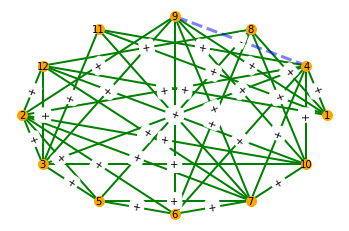

Graph is unbalance, Graph contains negative edge that belong to positive connected component: (4, 9)


False

In [233]:
G = createAssignErdosRenyiGraph(12,0.6,0.95)
checkBalance(G)

The input graph:


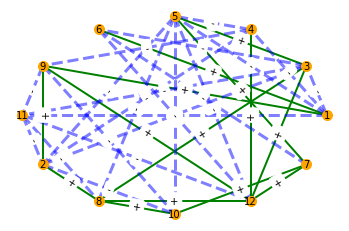

Graph is unbalance, Graph contains negative edge that belong to positive connected component: (1, 3)


False

In [234]:
G = createAssignErdosRenyiGraph(12,0.6,0.5)
checkBalance(G)

The input graph:


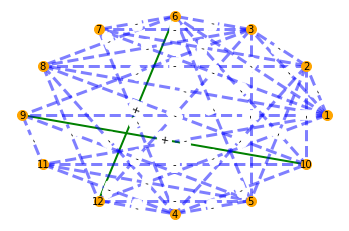

Graph is not balance
Reason: Graph contains cycle with an odd number of negative edges


False

In [229]:
G = createAssignErdosRenyiGraph(12,0.6,0.05)
checkBalance(G)